Model Building using Artificial Neural Network (ANN)

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [86]:
df = pd.read_csv('all_data_to_train.csv')
df.head(2)

,age,credit_sum,credit_month,tariff_id,score_shk,monthly_income,credit_count,overdue_credit_count,marital_status,job_position,living_region,education,gender,target,train_test
0,48,59998.0,10,1.6,0.770249,30000,1,1,0.153104,0.189224,0.203165,0.139701,0.193810,0.0,1
1,28,10889.0,6,1.1,0.248514,43000,2,0,0.153104,0.189224,0.232049,0.139701,0.159967,0.0,1


In [87]:
X_train_unscaled = df[df.train_test == 1].drop(['train_test'], axis =1)
X_test_unscaled = df[df.train_test == 0].drop(['train_test'], axis =1)
X_train_unscaled = X_train_unscaled.drop('target', axis=1)
X_test_unscaled = X_test_unscaled.drop('target', axis=1)

y_train_unscaled = df[df.train_test==1].target

In [88]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_unscaled, y_train_unscaled, test_size = 0.15, random_state = 0)

In [89]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [90]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [114]:
# Initializing the ANN
classifier2 = Sequential()

Parameters specified:
- units = 1 output should have 1 neuron
- tanh activation function - for non-linear range(0,1) variables. sigmoid is also option but it converges to 0 mostly
- loss = binary_crossentropy because answer is binary
- uniform kernel initializer - means weights are initialized uniformly between 0 and 1
- adamax optimizer - good for reducing cost function => good classification

In [115]:
# Adding the input layer and the first hidden layer
classifier2.add(Dense(activation="relu", input_dim=13, units=8, kernel_initializer="uniform"))

In [116]:
# Adding the input layer and the second hidden layer
classifier2.add(Dense(activation="relu", units=7, kernel_initializer="uniform"))

In [117]:
# Adding the input layer and the third hidden layer
classifier2.add(Dense(activation="relu", units=5, kernel_initializer="uniform"))

In [118]:
# Adding the output layer
classifier2.add(Dense(activation="tanh", units=1, kernel_initializer="uniform")) 

In [119]:
# Compiling the ANN
classifier2.compile(optimizer = 'adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [120]:
# Fitting the ANN to the Training set
classifier2.fit(X_train, y_train, batch_size = 16, epochs = 20)

Epoch 1/20
9061/9061 [==============================] - 26s 3ms/step - loss: 0.4685 - accuracy: 0.8235
Epoch 2/20
9061/9061 [==============================] - 25s 3ms/step - loss: 0.4381 - accuracy: 0.8237
Epoch 3/20
9061/9061 [==============================] - 25s 3ms/step - loss: 0.4365 - accuracy: 0.8238
Epoch 4/20
9061/9061 [==============================] - 25s 3ms/step - loss: 0.4353 - accuracy: 0.8239
Epoch 5/20
9061/9061 [==============================] - 25s 3ms/step - loss: 0.4313 - accuracy: 0.8242
Epoch 6/20
9061/9061 [==============================] - 25s 3ms/step - loss: 0.4224 - accuracy: 0.8243
Epoch 7/20
9061/9061 [==============================] - 25s 3ms/step - loss: 0.4176 - accuracy: 0.8249
Epoch 8/20
9061/9061 [==============================] - 25s 3ms/step - loss: 0.4152 - accuracy: 0.8251
Epoch 9/20
9061/9061 [==============================] - 25s 3ms/step - loss: 0.4139 - accuracy: 0.8252
Epoch 10/20
9061/9061 [==============================] - 25s 3ms/step - l

In [121]:
classifier2.predict([[54,24990,12,1.1,0.41,40000,6,0,0.21,0.189,0.17,0.14,0.159]])

array([[1.]], dtype=float32)

In [127]:
y_pred = classifier2.predict(X_test)
y_pred_rounded = np.round(y_pred)

In [129]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred_rounded)
accuracy=accuracy_score(y_test,y_pred_rounded)

In [130]:
accuracy

0.8299261228159325

In [131]:
cm

array([[20940,   209],
       [ 4142,   292]])

In [132]:
import seaborn as sns

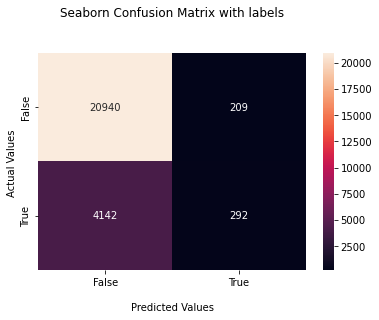

In [133]:
ax = sns.heatmap(cm, annot=True, fmt='')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [134]:
import pickle

with open('ANN_model2.pkl', 'wb') as f:
  pickle.dump(classifier2, f)

INFO:tensorflow:Assets written to: ram://86f11411-fcc6-487e-bf70-23a79c3315d7/assets
